In [1]:
import os
import sys
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import pandas as pd
sys.path.append('code')
from tasks.link_prediction import LinkPredictor
from dataset import GraphDataset

In [2]:
data_path = 'data'
dataset = 'Router'

# Load dataset
graph_data = GraphDataset(data_path)
graph_data.load_graph(dataset)
graph, node_subjects = graph_data.graph, graph_data.node_subjects

if node_subjects.empty:
        node_subjects = None

# Calculate graph statistics
num_edges = graph.number_of_edges()
num_nodes = graph.number_of_nodes()
print("\nGraph Loaded:")
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


Graph Loaded:
Number of nodes: 5022
Number of edges: 6258


In [3]:
# run link prediction
clf = LinkPredictor(graph=graph)
df_result = pd.DataFrame()
for method in ['DNE', 'GraRep', 'HOPE', 'LINE', 'NetMF', 'LLE', 'N2V', 'SVD']:
    result = clf.train_and_evaluate(method, node_subjects, cv_fold=5, n_trials=1)
    df_result = pd.concat([df_result, result])

Generate DNE embeddings for Train Graph
Generate GraRep embeddings for Train Graph
Generate HOPE embeddings for Train Graph
Generate LINE embeddings for Train Graph
Generate NetMF embeddings for Train Graph
Running NetMF for a small window size...
Compute matrix %d-th power 1
Compute matrix %d-th power 2
Compute matrix %d-th power 3
Compute matrix %d-th power 4
Compute matrix %d-th power 5
Generate LLE embeddings for Train Graph
Generate N2V embeddings for Train Graph
Generate SVD embeddings for Train Graph


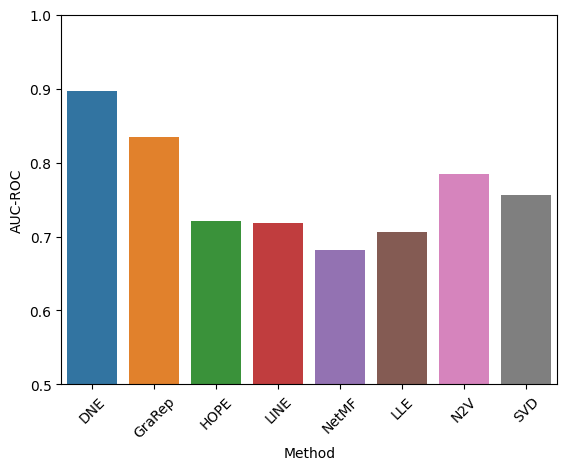

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='method', y='auc_roc', data=df_result, hue='method')
plt.xlabel('Method')
plt.ylabel('AUC-ROC')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.show()